baseProjetOCR/6_7.png
[8.0, 0.0, 5.0, 13.0, 16.0, 18.0, 21.0, 23.0, 23.0, 13.0, 13.0, 12.0, 10.0, 11.0, 10.0, 10.0, 9.0, 9.0, 9.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 9.0, 10.0, 9.0, 8.0, 7.0, 8.0, 7.0, 21.0, 27.0, 36.0, 41.0, 45.0, 50.0, 33.0, 30.0, 28.0, 25.0, 22.0, 21.0, 21.0, 21.0, 24.0, 26.0, 28.0, 31.0, 35.0, 41.0, 45.0, 42.0, 33.0, 24.0, 11.0, 0.0, 0.0, 0.0]


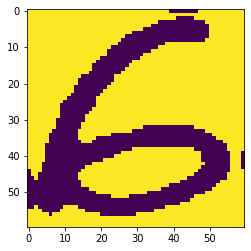

In [33]:
from skimage import io
from skimage.transform import resize
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
from typing import Iterator

FIRST = 6
SECOND = 4
SIZE = 60
THRESHOLD = 150

def MapToHProfile(matrix: np.ndarray):
    return SIZE - matrix.sum()
    
def getHorizontaleProfile(img):
    img = resize(img, (SIZE, SIZE), preserve_range=True).astype('uint8')
    binarized = 1.0 * (img > THRESHOLD)
    binarized = binarized[:,:,0]
    return (list(map(MapToHProfile, binarized)),binarized)
    

# read in image as 8 bit grayscale
img = io.imread(f'baseProjetOCR/{FIRST}_{SECOND}.png')

hProfile = getHorizontaleProfile(img)
vector = hProfile[0]
img = hProfile[1]

def jspTropEncore():
    vectors = []
    for i in range(0,10):
        for j in range(1,11):
            if (i == FIRST and j == SECOND):
                continue
            name = f'baseProjetOCR/{i}_{j}.png'
            compImg = io.imread(name)
            vector = getHorizontaleProfile(compImg)[0]
            vectors.append((name,vector))
    return vectors

def findMatch(aVector, vectors):
    highest = 'null'
    highScore = 0
    for item in vectors:
        vals = item[1]
        score = 0
        for index in range(SIZE):
            difference = max(aVector[index],vals[index]) - min(aVector[index],vals[index])
            score += difference if (difference <= 3) else 0
        if (score > highScore):
            highest = item[0]
            highScore = score
    return highest
        
        

print(findMatch(vector,jspTropEncore()))
print(vector)
imgplot = plt.imshow(img)
plt.show()


